In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as  tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, LSTM

In [3]:
x_train = np.load('./npy_brestCancer/x_train.npy')
y_train = np.load('./npy_brestCancer/y_train.npy')
x_test=np.load('./npy_brestCancer/x_test.npy')
y_test=np.load('./npy_brestCancer/y_test.npy')

In [4]:
x_train = x_train / 255.0
x_test = x_test / 255.0

In [5]:
print(x_train[0].shape)
print(x_train.shape[1:])

(64, 64)
(64, 64)


In [6]:
# bulid model
model = Sequential()
model.add(LSTM(128, input_shape=(x_train.shape[1:]), activation='relu', return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(128, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(2, activation='softmax'))

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 64, 128)           98816     
                                                                 
 dropout (Dropout)           (None, 64, 128)           0         
                                                                 
 lstm_1 (LSTM)               (None, 128)               131584    
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense (Dense)               (None, 32)                4128      
                                                                 
 dropout_2 (Dropout)         (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 2)                 6

In [8]:
opt = tf.keras.optimizers.Adam(lr=1e-3, decay=1e-5)

C:\Users\Admin\AppData\Roaming\Python\Python39\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [9]:
model.compile(loss='binary_crossentropy', optimizer=opt,
             metrics=['accuracy'])

In [10]:
history=model.fit(x_train, y_train, epochs=5,validation_data=(x_test, y_test) )#validation_split=0.3)

Epoch 1/5
28/28 [==============================] - 6s 142ms/step - loss: 0.6609 - accuracy: 0.6735 - val_loss: 0.6546 - val_accuracy: 0.6790
Epoch 2/5
28/28 [==============================] - 4s 141ms/step - loss: 0.6463 - accuracy: 0.6792 - val_loss: 0.6274 - val_accuracy: 0.6790
Epoch 3/5
28/28 [==============================] - 4s 141ms/step - loss: 0.6435 - accuracy: 0.6792 - val_loss: 0.6375 - val_accuracy: 0.6790
Epoch 4/5
28/28 [==============================] - 4s 139ms/step - loss: 0.6370 - accuracy: 0.6792 - val_loss: 0.6277 - val_accuracy: 0.6790
Epoch 5/5
28/28 [==============================] - 4s 136ms/step - loss: 0.6370 - accuracy: 0.6792 - val_loss: 0.6304 - val_accuracy: 0.6790


In [13]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

In [14]:
#                      EVALUATE TRAINED MODEL
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.6304178237915039
Test accuracy: 0.6789838075637817


In [15]:
from keras import metrics
from sklearn.metrics import confusion_matrix

In [17]:
pred = model.predict(x_test)

14/14 [==============================] - 1s 20ms/step


In [18]:
confusion_matrix(pred, np.argmax(y_test,axis =1))

ValueError: Classification metrics can't handle a mix of continuous-multioutput and binary targets

In [126]:
import seaborn as sns

In [19]:
def plot_heatmap(cm,title):
    df_cm2 = pd.DataFrame(cm, index = ['Benign', 'Malignant'])
    df_cm2.columns=['Benign', 'Malignant']
    f,ax = plt.subplots(figsize=(12, 12))
    #ax = plt.axes()
    sns.heatmap(df_cm2, annot=True, fmt="d", linewidths=.5,ax=ax)
    ax.set_title(title)
    plt.show()

    
    return

In [20]:
plot_heatmap(confusion_matrix(pred, np.argmax(y_test,axis =1)),'Emotion Recognition With LSTM')

ValueError: Classification metrics can't handle a mix of continuous-multioutput and binary targets

In [21]:
from sklearn.metrics import classification_report
print(classification_report(pred, np.argmax(y_test,axis =1)))

ValueError: Classification metrics can't handle a mix of continuous-multioutput and binary targets

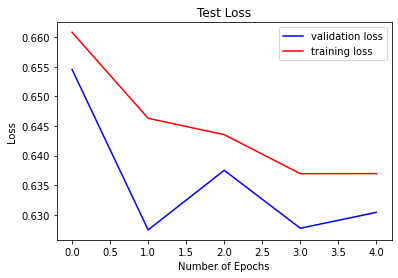

In [22]:
plt.plot(history.history['val_loss'], color='b', label="validation loss")
plt.plot(history.history['loss'], color='r', label="training loss")
plt.title("Test Loss")
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

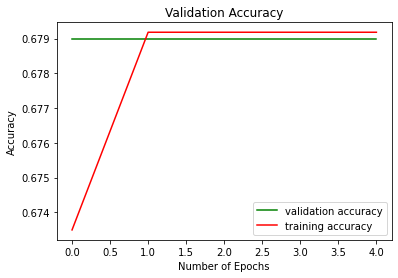

In [24]:
# Plot the accuracy curve for validation 
plt.plot(history.history['val_accuracy'], color='g', label="validation accuracy")
plt.plot(history.history['accuracy'], color='r', label="training accuracy")
plt.title("Validation Accuracy")
plt.xlabel("Number of Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [25]:
model.save('LSTM_weights_2.h5')
model.load_weights('LSTM_weights_2.h5')
model_feat = Model(inputs=model.input,outputs=model.get_layer('dense_1').output)

feat_train = model_feat.predict(x_train)
print(feat_train.shape)

#feat_val = model_feat.predict(x_val)
#print(feat_val.shape)

feat_test = model_feat.predict(x_test)
print(feat_test.shape)

28/28 [==============================] - 1s 20ms/step
(879, 2)
14/14 [==============================] - 0s 21ms/step
(433, 2)


In [27]:
from keras import metrics
from sklearn.metrics import confusion_matrix
pred = model.predict(x_test)

14/14 [==============================] - 0s 19ms/step


In [28]:
from sklearn.svm import SVC
svm = SVC(kernel='rbf')
svm.fit(feat_train,np.argmax(y_train,axis=1))
print('fitting done !!!')

fitting done !!!


In [32]:
Pred_labels = svm.predict(feat_test)
from sklearn.metrics import classification_report
print(classification_report(Pred_labels, np.argmax(y_test,axis =1),digits=4))

              precision    recall  f1-score   support

           0     1.0000    0.6790    0.8088       433
           1     0.0000    0.0000    0.0000         0

    accuracy                         0.6790       433
   macro avg     0.5000    0.3395    0.4044       433
weighted avg     1.0000    0.6790    0.8088       433



C:\Users\Admin\anaconda3\envs\CPUTensorflow\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Admin\anaconda3\envs\CPUTensorflow\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Admin\anaconda3\envs\CPUTensorflow\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [33]:
import xgboost as xgb

xb = xgb.XGBClassifier()

xb.fit(feat_train,np.argmax(y_train,axis=1))

print('fitting done !!!')

fitting done !!!


In [34]:
Pred_labels = xb.predict(feat_test)
print(classification_report(Pred_labels, np.argmax(y_test,axis =1),digits=4))

              precision    recall  f1-score   support

           0     0.7653    0.7353    0.7500       306
           1     0.4173    0.4567    0.4361       127

    accuracy                         0.6536       433
   macro avg     0.5913    0.5960    0.5930       433
weighted avg     0.6632    0.6536    0.6579       433



In [35]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import BaggingClassifier, ExtraTreesClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import model_selection

In [36]:
lr = LogisticRegression()
lr.fit(feat_train,np.argmax(y_train,axis=1))
print('fitting done !!!')

fitting done !!!


In [37]:
Pred_labels = lr.predict(feat_test)
print(classification_report(Pred_labels, np.argmax(y_test,axis =1),digits=4))

              precision    recall  f1-score   support

           0     1.0000    0.6790    0.8088       433
           1     0.0000    0.0000    0.0000         0

    accuracy                         0.6790       433
   macro avg     0.5000    0.3395    0.4044       433
weighted avg     1.0000    0.6790    0.8088       433



C:\Users\Admin\anaconda3\envs\CPUTensorflow\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Admin\anaconda3\envs\CPUTensorflow\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Admin\anaconda3\envs\CPUTensorflow\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [38]:
dt = DecisionTreeClassifier()
dt.fit(feat_train,np.argmax(y_train,axis=1))
print('fitting done !!!')
Pred_labels = dt.predict(feat_test)
print(classification_report(Pred_labels, np.argmax(y_test,axis =1),digits=4))

fitting done !!!
              precision    recall  f1-score   support

           0     0.7041    0.7314    0.7175       283
           1     0.4532    0.4200    0.4360       150

    accuracy                         0.6236       433
   macro avg     0.5787    0.5757    0.5767       433
weighted avg     0.6172    0.6236    0.6200       433



In [39]:
knn = KNeighborsClassifier()
knn.fit(feat_train,np.argmax(y_train,axis=1))
print('fitting done !!!')
Pred_labels = knn.predict(feat_test)
print(classification_report(Pred_labels, np.argmax(y_test,axis =1),digits=4))

fitting done !!!
              precision    recall  f1-score   support

           0     0.7789    0.7459    0.7621       307
           1     0.4388    0.4841    0.4604       126

    accuracy                         0.6697       433
   macro avg     0.6089    0.6150    0.6112       433
weighted avg     0.6800    0.6697    0.6743       433



In [40]:
lda = LinearDiscriminantAnalysis()
lda.fit(feat_train,np.argmax(y_train,axis=1))
print('fitting done !!!')
Pred_labels = lda.predict(feat_test)
print(classification_report(Pred_labels, np.argmax(y_test,axis =1),digits=4))

fitting done !!!
              precision    recall  f1-score   support

           0     1.0000    0.6790    0.8088       433
           1     0.0000    0.0000    0.0000         0

    accuracy                         0.6790       433
   macro avg     0.5000    0.3395    0.4044       433
weighted avg     1.0000    0.6790    0.8088       433



C:\Users\Admin\anaconda3\envs\CPUTensorflow\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Admin\anaconda3\envs\CPUTensorflow\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Admin\anaconda3\envs\CPUTensorflow\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [41]:
nb = GaussianNB()
nb.fit(feat_train,np.argmax(y_train,axis=1))
print('fitting done !!!')
Pred_labels = nb.predict(feat_test)
print(classification_report(Pred_labels, np.argmax(y_test,axis =1),digits=4))

fitting done !!!
              precision    recall  f1-score   support

           0     1.0000    0.6790    0.8088       433
           1     0.0000    0.0000    0.0000         0

    accuracy                         0.6790       433
   macro avg     0.5000    0.3395    0.4044       433
weighted avg     1.0000    0.6790    0.8088       433



C:\Users\Admin\anaconda3\envs\CPUTensorflow\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Admin\anaconda3\envs\CPUTensorflow\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Admin\anaconda3\envs\CPUTensorflow\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [42]:
et = ExtraTreesClassifier()
et.fit(feat_train,np.argmax(y_train,axis=1))
print('fitting done !!!')
Pred_labels = et.predict(feat_test)
print(classification_report(Pred_labels, np.argmax(y_test,axis =1),digits=4))

fitting done !!!
              precision    recall  f1-score   support

           0     0.6939    0.7312    0.7120       279
           1     0.4604    0.4156    0.4369       154

    accuracy                         0.6189       433
   macro avg     0.5772    0.5734    0.5745       433
weighted avg     0.6109    0.6189    0.6142       433



In [44]:
estimators = list()
estimators.append(('RF', RandomForestClassifier()))
estimators.append(('LR', LogisticRegression()))
estimators.append(('DTC', DecisionTreeClassifier()))
estimators.append(('KNN', KNeighborsClassifier()))
estimators.append(('LDA', LinearDiscriminantAnalysis()))
estimators.append(('NB', GaussianNB()))
#estimators.append(('SVM', GradientBoostingClassifier(learning_rate=0.01, n_estimators=1500,max_depth=4, min_samples_split=40, min_samples_leaf=7,max_features=4 , subsample=0.95, random_state=10)))
estimators.append(('XGB', XGBClassifier()))

In [45]:
ensemble = VotingClassifier(estimators=estimators, voting='soft')
ensemble.fit(feat_train,np.argmax(y_train,axis=1))
print('fitting done !!!')
Pred_labels = ensemble.predict(feat_test)
print(classification_report(Pred_labels, np.argmax(y_test,axis =1),digits=4))

fitting done !!!
              precision    recall  f1-score   support

           0     0.7857    0.7287    0.7561       317
           1     0.3813    0.4569    0.4157       116

    accuracy                         0.6559       433
   macro avg     0.5835    0.5928    0.5859       433
weighted avg     0.6774    0.6559    0.6649       433



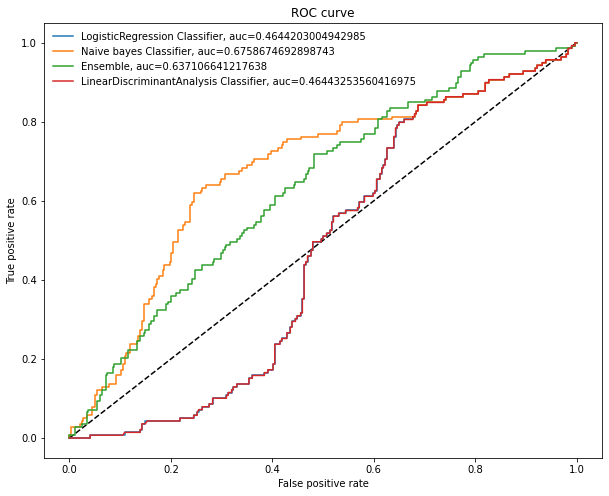

In [46]:
from sklearn import metrics
from sklearn.metrics import roc_curve


clf2=LogisticRegression().fit(feat_train,np.argmax(y_train,axis=1))
y_pred2 = clf2.predict(feat_test)

clf3 = GaussianNB().fit(feat_train,np.argmax(y_train,axis=1))
y_pred3 = clf3.predict(feat_test)

clf4 = ensemble.fit(feat_train,np.argmax(y_train,axis=1))
y_pred4 = clf4.predict(feat_test)

clf6=LinearDiscriminantAnalysis().fit(feat_train,np.argmax(y_train,axis=1))
y_pred6 = clf6.predict(feat_test)

#clf7=SVC(kernel='rbf').fit(feat_train,np.argmax(y_train,axis=1))
#y_pred7 = clf7.predict(feat_test)

y_pred_proba2 = clf2.predict_proba(feat_test)[::,1]
fpr2, tpr2, _ = metrics.roc_curve(np.argmax(y_test,axis =1),  y_pred_proba2)
auc2 = metrics.roc_auc_score(np.argmax(y_test,axis =1), y_pred_proba2)

y_pred_proba3 = clf3.predict_proba(feat_test)[::,1]
fpr3, tpr3, _ = metrics.roc_curve(np.argmax(y_test,axis =1),  y_pred_proba3)
auc3 = metrics.roc_auc_score(np.argmax(y_test,axis =1), y_pred_proba3)

y_pred_proba4 = clf4.predict_proba(feat_test)[::,1]
fpr4, tpr4, _ = metrics.roc_curve(np.argmax(y_test,axis =1),  y_pred_proba4)
auc4 = metrics.roc_auc_score(np.argmax(y_test,axis =1), y_pred_proba4)

y_pred_proba6 = clf6.predict_proba(feat_test)[::,1]
fpr6, tpr6, _ = metrics.roc_curve(np.argmax(y_test,axis =1),  y_pred_proba6)
auc6 = metrics.roc_auc_score(np.argmax(y_test,axis =1), y_pred_proba6)

#y_pred_proba7 = clf7.predict_proba(feat_test)[::,1]
#fpr7, tpr7, _ = metrics.roc_curve(np.argmax(y_test,axis =1),  y_pred_proba7)
#auc7 = metrics.roc_auc_score(np.argmax(y_test,axis =1), y_pred_proba7)


plt.figure(figsize=(10, 8))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr2,tpr2,label="LogisticRegression Classifier, auc="+str(auc2))
plt.plot(fpr3,tpr3,label="Naive bayes Classifier, auc="+str(auc3))
plt.plot(fpr4,tpr4,label="Ensemble, auc="+str(auc4))
plt.plot(fpr6,tpr6,label="LinearDiscriminantAnalysis Classifier, auc="+str(auc6))
#plt.plot(fpr7,tpr7,label="SVC Classifier, auc="+str(auc7))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(frameon=False)
plt.show()